In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

###### EDA

<Axes: xlabel='class', ylabel='count'>

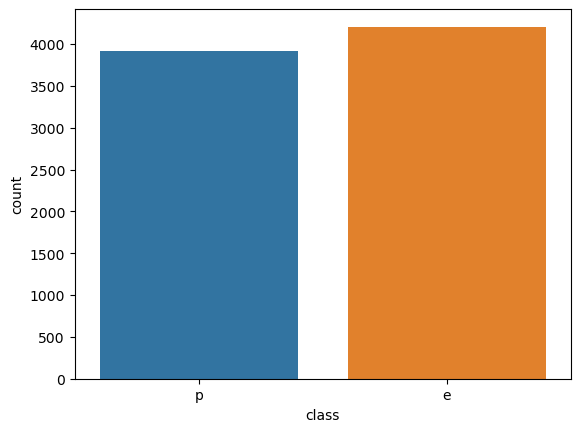

In [7]:
sns.countplot(data=df, x='class')

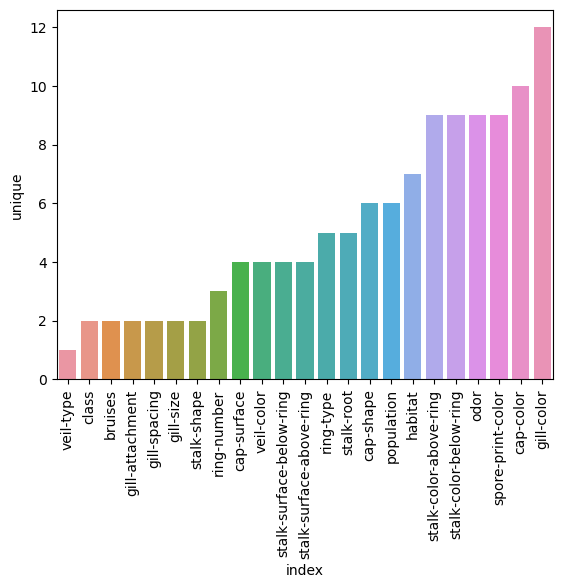

In [13]:
des = df.describe().transpose().reset_index().sort_values('unique')

sns.barplot(data=des, x= 'index', y = 'unique')
plt.xticks(rotation = 90)

plt.show()

###### Train Test Split

In [15]:
X = pd.get_dummies(df.drop('class',axis=1), drop_first=True)
y = df['class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=101)

###### Model

In [18]:
from sklearn.ensemble import AdaBoostClassifier

In [19]:
model = AdaBoostClassifier(n_estimators=1)

In [20]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1)

###### Evaluation

In [21]:
from sklearn.metrics import classification_report, accuracy_score

In [22]:
pred = model.predict(X_test)
pred

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [25]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
np.argmax(model.feature_importances_)

22

In [28]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

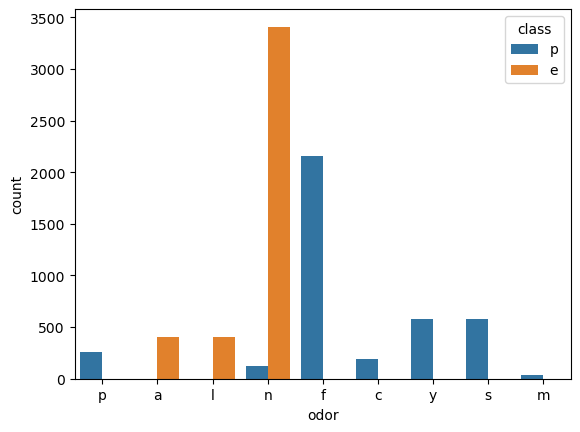

In [29]:
sns.countplot(data=df,x='odor',hue='class')

###### Analyse more weak learners

In [30]:
len(X.columns)

95

In [31]:
error_rates = []

for n in range(1,96):
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test,pred)
    error_rates.append(err)

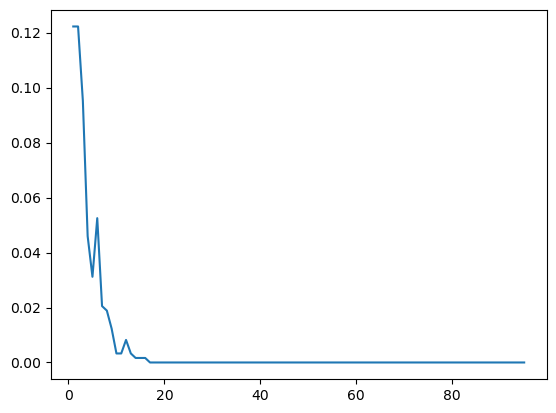

In [32]:
plt.plot(range(1,96), error_rates)

In [33]:
model

AdaBoostClassifier(n_estimators=95)

In [34]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [35]:
feats = pd.DataFrame(index=X.columns, data = model.feature_importances_, columns = ['Importance'])
feats

,Importance
cap-shape_c,0.000000
cap-shape_f,0.000000
cap-shape_k,0.000000
cap-shape_s,0.000000
cap-shape_x,0.000000
...,...
habitat_l,0.000000
habitat_m,0.000000
habitat_p,0.000000
habitat_u,0.000000


In [43]:
imp_feats = feats[feats['Importance'] > 0]
imp_feats

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


In [48]:
if1 = imp_feats.reset_index().sort_values('Importance')
if1

,index,Importance
0,cap-color_c,0.010526
16,ring-number_t,0.010526
15,stalk-color-below-ring_w,0.010526
11,stalk-root_b,0.010526
10,stalk-shape_t,0.010526
21,habitat_w,0.010526
1,cap-color_n,0.010526
2,cap-color_w,0.010526
7,odor_p,0.021053
4,odor_c,0.031579


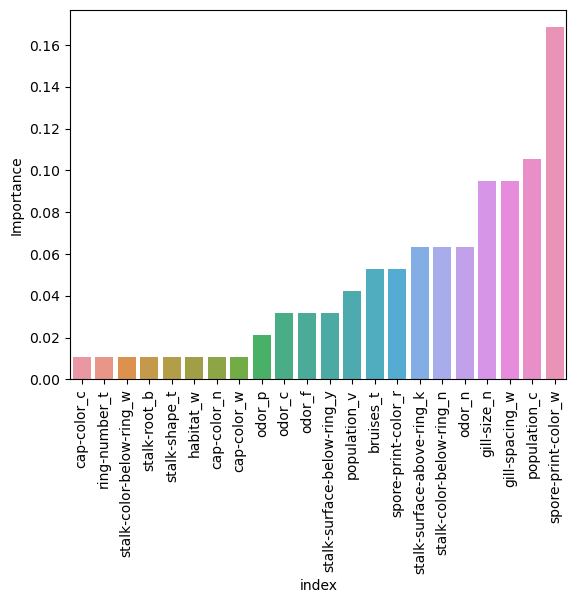

In [50]:
sns.barplot(data = if1, x = 'index', y = 'Importance')
plt.xticks(rotation = 90)
plt.show()